## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [3]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

## Création du jeu de données (dataset)

In [4]:
nbr_points = 10000

In [5]:
x = np.random.normal(-2,.75,nbr_points)

In [6]:
y = np.random.normal(-2,.75,nbr_points)

In [7]:
z = 'RED'

In [8]:
c = {'X' : x, 'Y': y, 'Color': 'red'}

In [9]:
df1 = pd.DataFrame(c)

In [10]:
df1.head(5)

X         Y Color
0 -1.678781 -2.394385   red
1 -1.286378 -1.842596   red
2 -1.585375 -2.455442   red
3 -2.691566 -2.283477   red
4 -1.613002 -1.403138   red

In [11]:
x = np.random.normal(2,.75,nbr_points)

In [12]:
y = np.random.normal(2,.75,nbr_points)

In [13]:
c = {'X' : x, 'Y': y, 'Color': 'green'}

In [14]:
df2 = pd.DataFrame(c)

In [15]:
df2.head(5)

X         Y  Color
0  2.261680  1.705484  green
1  1.917548  2.133089  green
2  2.166861  2.041608  green
3  2.585932  1.316274  green
4  1.746455  1.790944  green

In [16]:
frames = [df1, df2]

In [17]:
dataset = pd.concat(frames)

In [18]:
dataset.head(5)

X         Y Color
0 -1.678781 -2.394385   red
1 -1.286378 -1.842596   red
2 -1.585375 -2.455442   red
3 -2.691566 -2.283477   red
4 -1.613002 -1.403138   red

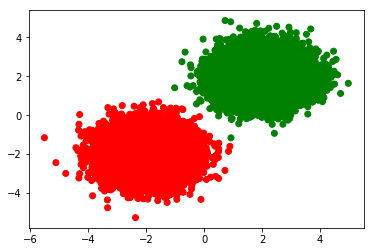

In [19]:
# Représentation graphique de notre jeu de données
plt.scatter(dataset['X'],dataset['Y'],color=dataset['Color'])
plt.show()

In [20]:
dataset.loc[:, 'X':'Y'][0:1]

X         Y
0 -1.678781 -2.394385

## Création d'une instance de modèle

In [21]:
# model creation
model = tf.keras.models.Sequential()

### comprenant l'ajout d'une couche de 2 neurones

In [22]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

### comprenant les critères suivants :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [23]:
# Création du modèle en spécifiant uniquement 2 sorties possibles : red ou green
model.compile(
    loss="binary_crossentropy",      # error calcul
    optimizer="adam",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
y_train = np.ravel(dataset['Color'])
y_train

array(['red', 'red', 'red', ..., 'green', 'green', 'green'], dtype=object)

## Nécessité d'encoder la sortie de votre modèle

In [25]:
#https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)


In [26]:
encoded_Y

array([1, 1, 1, ..., 0, 0, 0])

## Création du modèle sur nos données
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [27]:
training = model.fit(np.array(dataset.loc[:, 'X':'Y']), encoded_Y, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16000/16000 [==============================] - 2s 131us/sample - loss: 0.7470 - acc: 0.5000 - val_loss: 0.7080 - val_acc: 0.5000
Epoch 2/10
16000/16000 [==============================] - 2s 120us/sample - loss: 0.6976 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 3/10
16000/16000 [==============================] - 2s 117us/sample - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
16000/16000 [==============================] - 2s 114us/sample - loss: 0.6931 - acc: 0.4999 - val_loss: 0.6931 - val_acc: 0.5002
Epoch 5/10
16000/16000 [==============================] - 2s 98us/sample - loss: 0.6931 - acc: 0.4972 - val_loss: 0.6931 - val_acc: 0.5230
Epoch 6/10
16000/16000 [==============================] - 2s 101us/sample - loss: 0.6931 - acc: 0.4929 - val_loss: 0.6931 - val_acc: 0.5244
Epoch 7/10
16000/16000 [==============================] - 2s 105

## Prédiction sur un individu du tableau dataset

In [31]:
np.array(dataset.loc[:, 'X':'Y'][0:1])

array([[-1.67878056, -2.39438532]])

In [28]:
# output example
model_output = model.predict(np.array(dataset.loc[:, 'X':'Y'][0:1]))

print(model_output)

## Voir pour avoir ces résultats.
#https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#https://appdividend.com/2018/07/23/prepare-dataset-for-machine-learning-in-python/

#print("Found : ", index_max(list(model_output[0])))
#print("Should be : ", labels[0:1][0])

[[0.4999999  0.50000006]]


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [83]:
### autres fonctions permettant d'apprécier le modèle

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [ ]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [ ]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

In [ ]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant data et labels, pour tester le modèle précédent

In [ ]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

In [ ]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [ ]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [ ]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [ ]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

## Résumé du modèle (couches de neurones)

In [ ]:
model.summary()

## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [ ]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

## Le modèle est-il bien entraîné ?

In [ ]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [ ]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

In [ ]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant